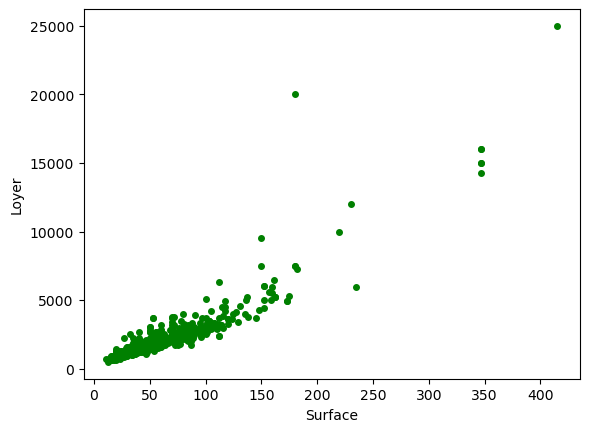

In [1]:


import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


#-----------------------------------

# le fichier dans votre drive  !! attention changer le chemin par le votre
df=pd.read_csv("../data/Loyers.csv")
df.head()

#-----------------------------------

# On affiche le nuage de points dont on dispose
plt.plot(df['surface'],  df['loyer'], 'go', markersize=4)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()


In [2]:
len(df)

545

In [3]:
# On peut considérer un extrait de taille plus petite du data pour le visualiser
x_extrait=df['surface'][:8]
y_extrait=df['loyer'][:8]

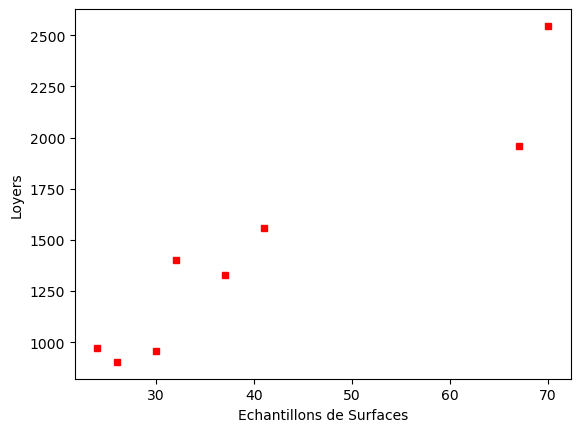

In [4]:
plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
plt.xlabel('Echantillons de Surfaces')
plt.ylabel('Loyers')
plt.show()


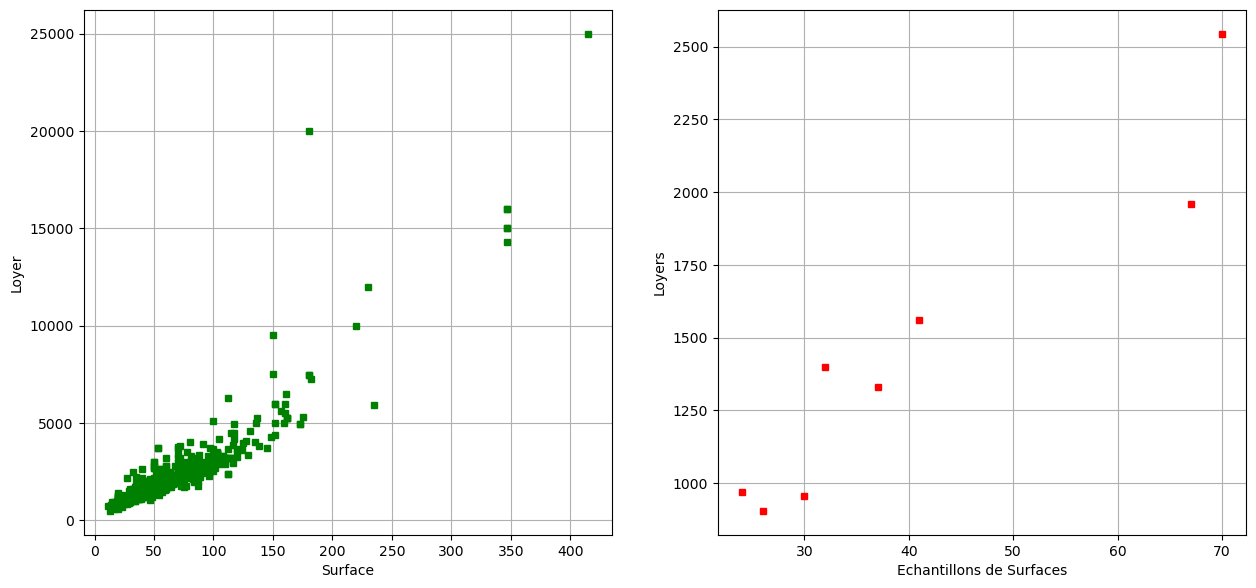

In [5]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.plot(df['surface'],  df['loyer'], 'gs', markersize=4)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
plt.xlabel('Echantillons de Surfaces')
plt.ylabel('Loyers')
plt.grid(True)

plt.show()

In [6]:
def droite(a,b,x):
    output=a*x+b
    return output

y_predit1=[droite(2, 3,x_extrait[i]) for i in range(8)]
y_predit2=[droite(10, 0,x_extrait[i]) for i in range(8)]
y_predit3=[droite(10, 1000,x_extrait[i]) for i in range(8)]
y_predit4=[droite(20, 1500,x_extrait[i]) for i in range(8)]


In [7]:
def dessiner():
    plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)



    plt.subplot(222)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_extrait, y_predit2, label='$y = 10 * x$',linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')


    plt.subplot(223)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_extrait, y_predit2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_extrait, y_predit3, label='$y= 10 * x + 1000',linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.subplot(224)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_extrait, y_predit2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_extrait, y_predit3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_extrait, y_predit4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.grid(True)
    #plt.legend(loc='upper right')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

    plt.grid(True)

    plt.show()

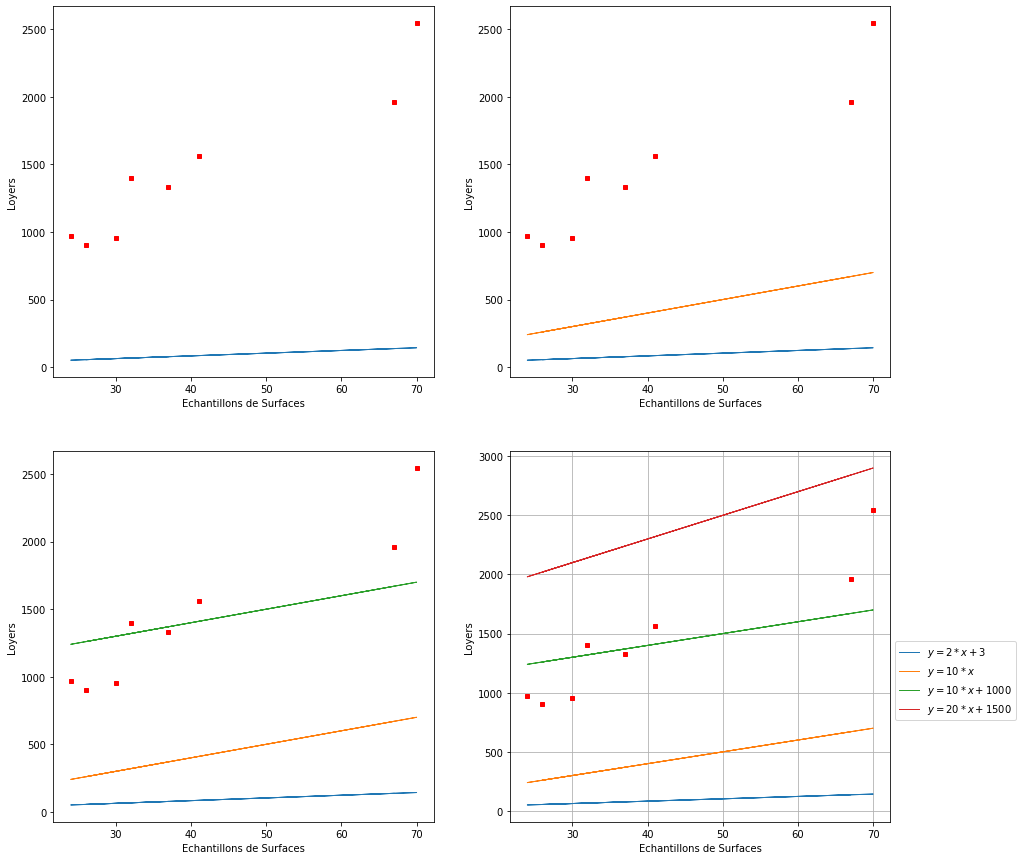

In [ ]:
dessiner()

In [8]:
x_extrait=df['surface'][:]
y_extrait=df['loyer'][:]

y_predit1=[droite(2, 3,x_extrait[i]) for i in range(len(df))]
y_predit2=[droite(10, 0,x_extrait[i]) for i in range(len(df))]
y_predit3=[droite(10, 1000,x_extrait[i]) for i in range(len(df))]
y_predit4=[droite(20, 1500,x_extrait[i]) for i in range(len(df))]

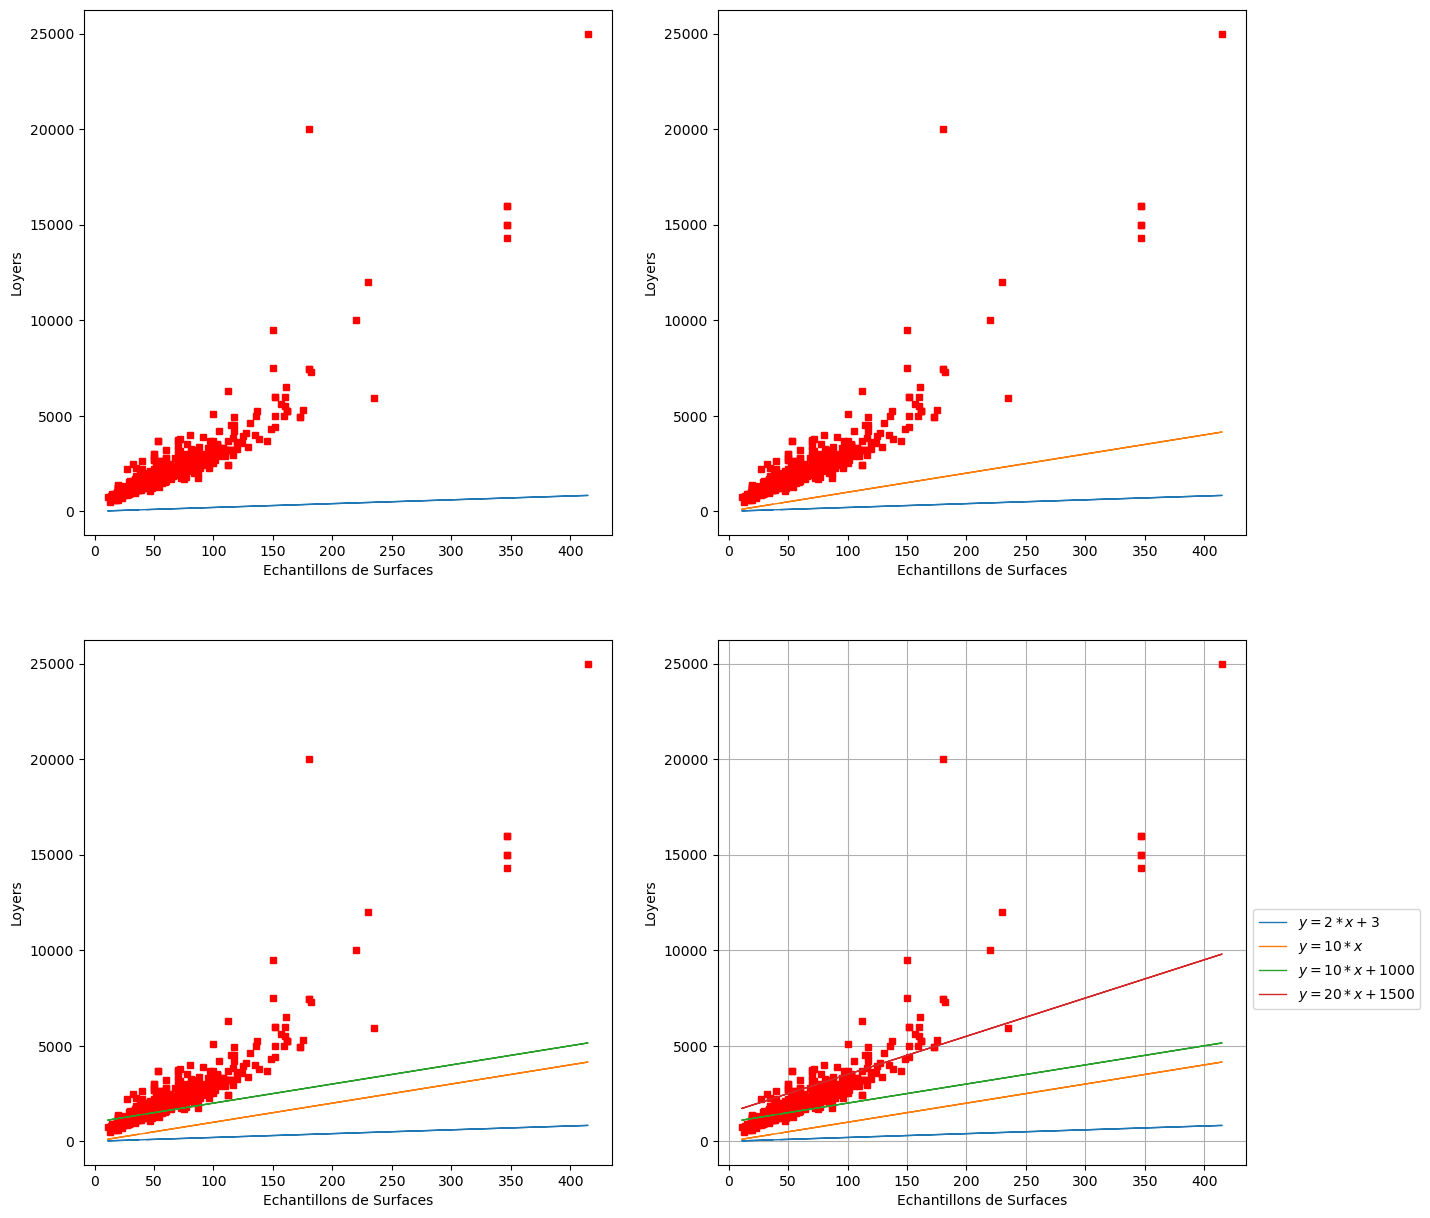

In [9]:
dessiner()

In [10]:
def Cout(y,y_appr):
    J=0.
    for i in range(len(df)):
        J=+(y[i] - y_appr[i])**2
    J=J*1/(2*len(df))
    return J



In [11]:
print('Cout1-----------:', Cout(y_predit1,y_extrait))
print('Cout2-----------:', Cout(y_predit2,y_extrait))
print('Cout3-----------:', Cout(y_predit3,y_extrait))
print('Cout4-----------:', Cout(y_predit4,y_extrait))



Cout1-----------: 2116.8449541284403
Cout2-----------: 1255.8715596330276
Cout3-----------: 26.513761467889907
Cout4-----------: 543.9449541284404


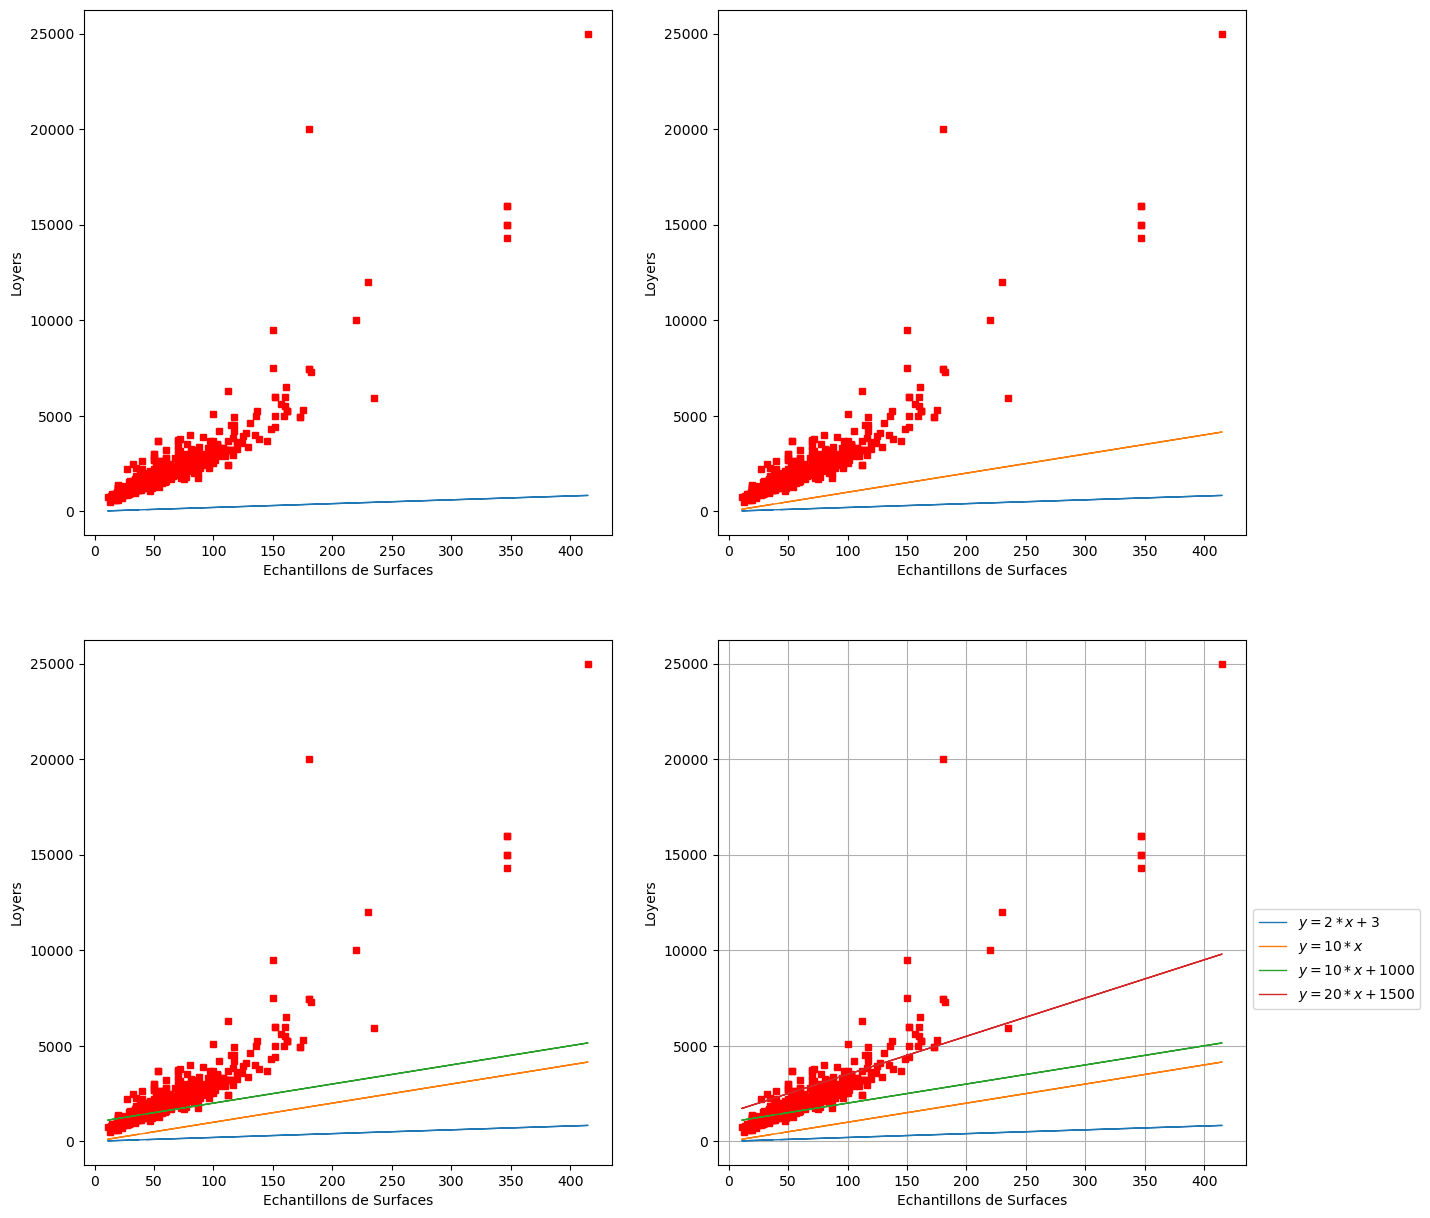

In [12]:
dessiner()

## Résolution directe


In [14]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(df.shape[0]), df['surface'].values]).T
y = np.matrix(df['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('Theta Optimal vaut:...........', theta)

Theta Optimal vaut:........... [[-283.37836117]
 [  40.97116431]]


In [15]:
theta[0]

matrix([[-283.37836117]])

In [16]:
y_predit_optimal=[droite(40.97116431, -283.37836117,x_extrait[i]) for i in range(len(df))]

In [17]:
print('Cout optimal-----------:', Cout(y_predit_optimal,y_extrait))

Cout optimal-----------: 7.538442618914793


In [ ]:
def dessiner2():
    plt.figure(figsize=(15, 15))


    plt.subplot(221)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_extrait, y_predit2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_extrait, y_predit3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_extrait, y_predit4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')


    plt.subplot(222)
    plt.plot(x_extrait,  y_extrait, 'rs', markersize=4)
    plt.plot(x_extrait, y_predit1, label='$y= 2 * x + 3 $', linewidth=1.0)
    plt.plot(x_extrait, y_predit2, label='$y = 10 * x$',linewidth=1.0)
    plt.plot(x_extrait, y_predit3, label='$y= 10 * x + 1000$',linewidth=1.0)
    plt.plot(x_extrait, y_predit4, label='$y= 20 * x + 1500$', linewidth=1.0)
    plt.plot(x_extrait, y_predit_optimal, label='$y= Teta1 * x + Teta0$', linewidth=1.0)

    plt.xlabel('Echantillons de Surfaces')
    plt.ylabel('Loyers')

    plt.grid(True)
    #plt.legend(loc='upper right')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

    plt.grid(True)

    plt.show()

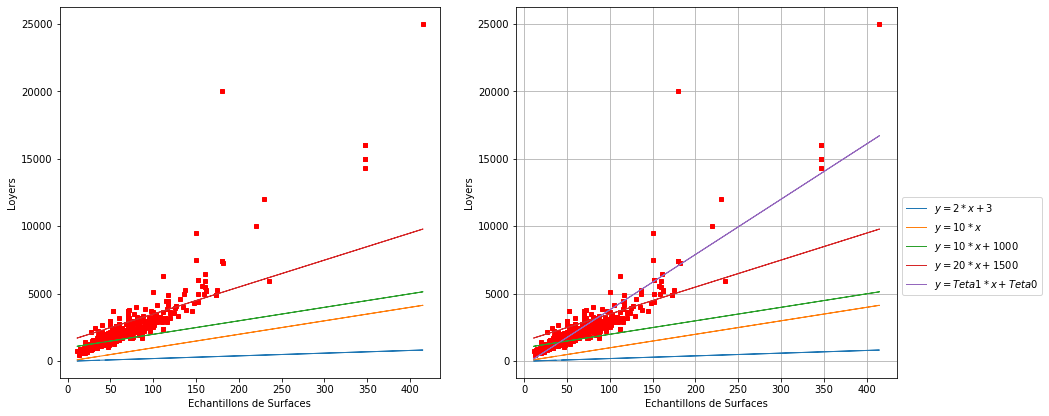

In [ ]:
dessiner2()